# Approximate Solutions to ODEs in Sage

## Numerical Approximations

Not every ODE can be solved exactly, e.g., the **pendulum ODE**
$$\theta'' + \sin\theta = 0$$
must be solved using special functions.

In [1]:
%display latex
var('t')
theta = function('theta')(t)

de = diff(theta, t, 2) + sin(theta) == 0
desolve(de, theta)

[-integrate(1/sqrt(-2*_K1 + 2*cos(theta(t))), theta(t)) == _K2 + t,
 integrate(1/sqrt(-2*_K1 + 2*cos(theta(t))), theta(t)) == _K2 + t]

The simplest (relatively speaking) numerical method is **Euler's method**: given an ODE $y' = f(x,y)$, an initial condition $y(x_{0}) = y_{0}$ and a step size $h$, we approximate $y$ at $x_1 = x_{0} + h$ by the formula
$$y_{1} = y_{0} + hf(x_{0}, y_{0}).$$
So $y_{1}\approx y(x_{1})$.

Once we have $y_{1}$, we approximate $y$ at $x_{2} = x_{1} + h = x_{0} + 2h$ by
$$y_{2} = y_{1} + hf(x_{1}, y_{1}).$$
So $y_{2}\approx y(x_{2})$.

In general, we approximate $y$ at $x_{n} = x_{0} + nh$ using
$$y_{n} = y_{n - 1} + hf(x_{n-1}, y_{n-1}).$$

**Example 1**: Approximate $y(1)$ where $y$ is the solution of the IVP
$$y' = y, y(0) = 1$$
using Euler's method with a step size of $h = 0.25$. Compare your approximation with the exact value of $y(1) = e$.

In [3]:
%display latex
# enter code for Example 1 here
var('y')
x0 = 0
y0 = 1
h = 0.25
f(x,y) = y

x1 = x0 + h
y1 = y0 + h * f(x0, y0)

x2 = x1 + h
y2 = y1 + h * f(x1, y1)

x2, y2

(0.500000000000000, 1.56250000000000)

Choosing smaller values of $h$ typically increases accuracy.

Sage also has a built-in function for applying Euler's method. But an even better choice is to use a *Runge-Kutta method* with `desolve_rk4`:

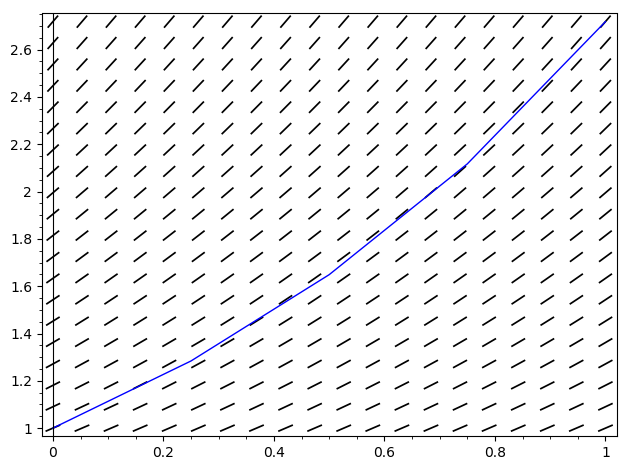

In [5]:
y = function('y')(x)
desolve_rk4(diff(y,x) == y, y, ics = [0,1], end_points = 1, step = 0.25, output = 'slope_field')

We can even get a decent plot using the option `output = 'slope_field'`.

**Example 2**: Use `desolve_rk4` to approximate $y(3)$, where $y$ is the solution of $y' = (x - y)^2, y(1) = 1.5$. Use a step size of $h = 0.1$.

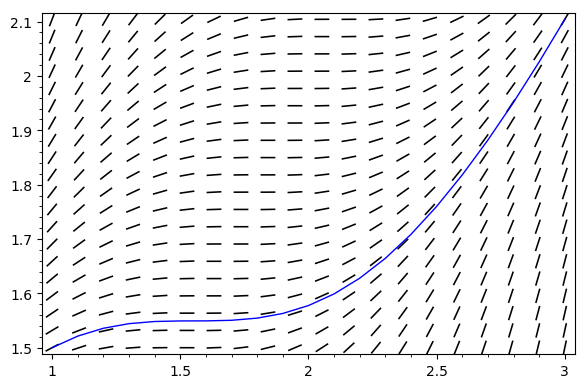

In [7]:
# code cell for Example 2
y = function('y')(x)
de = diff(y,x ) == (x - y)^2
desolve_rk4(de, y, ics = [1, 1.5], end_points = 3, step = 0.1, output = "slope_field")

**Example 3**: Modify the code in the previous example to create an interactive plot that allows the user to enter the initial condition $y(x_{0}) = y_{0}$ using `input_box` and the step size $h$ using `slider`.

In [ ]:
# code cell for Example 3
@interact
def _(x0 = input_box(1, width = 20, label = "$x$"), y0 = input_box(), h = slider()):
    desolve_rk4(de, y, ics = [1, 1.5], end_points = 3, step = 0.1, output = "slope_field")

## Visualizing Solutions

Using `output = slope_field` in `desolve_rk4` provides our first example of a **slope field** (or **direction field**) and **solution curve**.

We can also plot slope fields without the solution curve using `plot_slope_field`. To plot a slope field for $y' = f(x,y)$, use
```sage
plot_slope_field(f, (x, xmin, xmax), (y, ymin, ymax))
```
In this command, $x$ and $y$ must be variables.

**Example 4**: Let $y(x)$ denote the solution of the initial value problem
$$y' = (x - y)^2, y(1) = 1.$$
Estimate $y(5)$ using a slope field. You may use either `desolve_rk4` and your code from Example 3 or the `plot_slope_field` command introduced above.

In [ ]:
# code cell for Example 4

## Algebraic Approximations

The final type of approximation we'll consider is an algebraic method known as **Picard iteration**. The idea is as follows: to solve the IVP $y' = f(x,y), y(x_{0}) = y_{0}$,
1. Make an initial guess $y = y_{0}$ (so the first guess is a constant function!).
2. Update the initial guess $y_{0}$ to get a new guess/approximation $y_{1}$, given by
$$y_{1} = y_{0} + \int_{x_{0}}^{x}f(t, y_{0})\,dt.$$
3. Update the new guess $y_{1}$ in the same manner to obtain
$$y_{2} = y_{0} + \int_{x_{0}}^{x}f(t,y_{1}(t))\,dt.$$
4. Continue in this way to obtain more and more **Picard iterates**
$$y_{n} = y_{0} + \int_{x_{0}}^{x}f(t, y_{n-1}(t))\,dt.$$

**Example 5**: Use Picard iteration to find the Picard iterate $y_{3}$ that approximates the solution of $y' = y, y(0) = 1$.

In [ ]:
# code cell for Example 5

In [ ]:
def picard(f, x0, y0, n):
    """
    Computes the nth Picard iterate of the equation y' = f(x,y) 
    with initial condition y(x0) = y0.
    """
    var('t')
    yn = y0    # initial guess
    for i in range(1, n + 1):
        yn = yn.subs(x = t)    # substitute t in for x before integrating
        yn = y0 + integral(f.subs(x = t, y = yn), t, x0, x)   # sub t in for x, yn in for y and then integrate
    return yn